# **Kütüphaneleri ekleme**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Veri setini çekme, inceleme ve gereksiz sütunları çıkarma**



In [4]:
df = pd.read_csv('loan_data_1.csv')

print(df.head())

df.info()
print(df.isnull().sum())
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Loan_ID', axis=1)

   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP001003   Male     Yes          1      Graduate            No   
1           1  LP001005   Male     Yes          0      Graduate           Yes   
2           2  LP001006   Male     Yes          0  Not Graduate            No   
3           3  LP001008   Male      No          0      Graduate            No   
4           4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           4583.0             1508.0       128.0             360.0   
1           3000.0                0.0        66.0             360.0   
2           2583.0             2358.0       120.0             360.0   
3           6000.0                0.0       141.0             360.0   
4           2333.0             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural         

# **Cinsiyet sütunundaki boşlukları doldurmak için grafikleri karşılaştır**

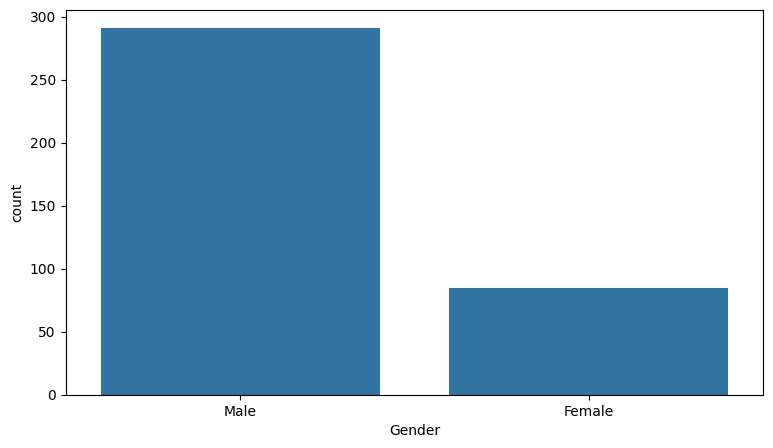

Gender
Male      291
Female     85
Name: count, dtype: int64


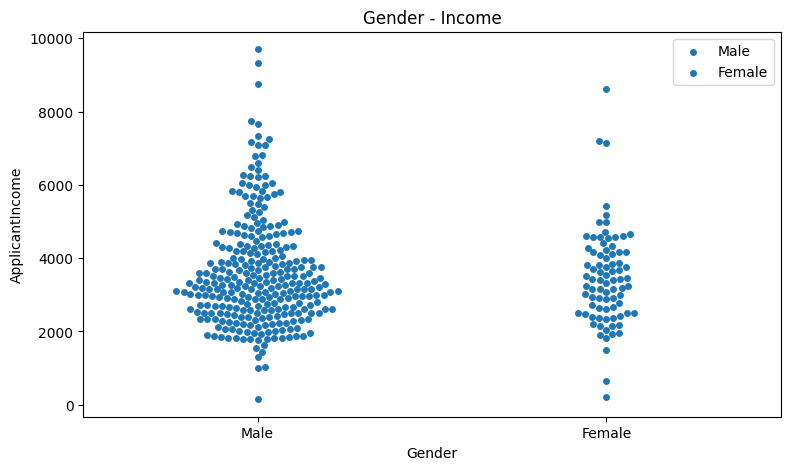

Erkeklerin gelir ortalaması: 3599.78445229682
Kadınların gelir ortalaması: 3454.3414634146343




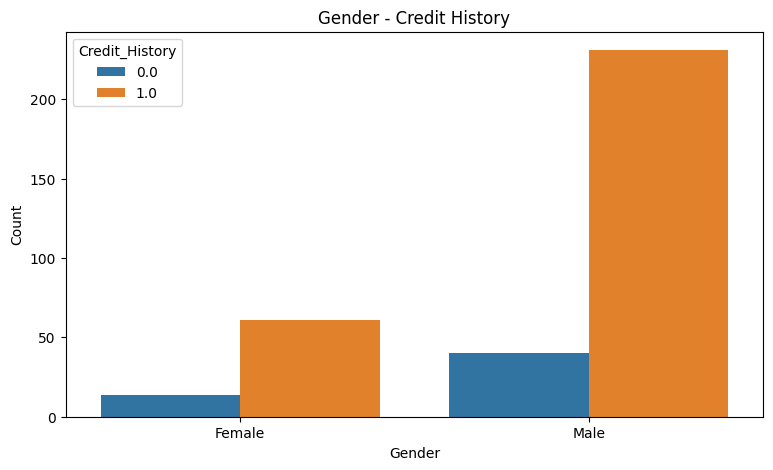

In [5]:
#Cinsiyet
plt.figure(figsize=(9,5))
sns.countplot(x = df.Gender)
plt.show()
print(df.Gender.value_counts())

#Cinsiyet ile gelir arasında bir ilişki var mı?
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Gender", y = "ApplicantIncome",data = df)
plt.legend(df.Gender.value_counts().index)
plt.title("Gender - Income")
plt.show()

#Kadınların gelir ortalaması
df_female = df[df.Gender == 'Female']
df_female_mean = df_female.ApplicantIncome.mean()

#Erkeklerin gelir ortalaması
df_male = df[df.Gender == 'Male']
df_male_mean = df_male.ApplicantIncome.mean()

print(f'Erkeklerin gelir ortalaması: {df_male_mean}\nKadınların gelir ortalaması: {df_female_mean}')

print('\n')
# #Cinsiyet ile kredi geçmişi arasındaki ilişki
df_Gender_CreditHistory = df.groupby(["Gender","Credit_History"]).size().reset_index(name = "Count")
df_Gender_CreditHistory['Credit_History'] = df_Gender_CreditHistory['Credit_History'].astype(str)
df_Gender_CreditHistory
plt.figure(figsize = (9,5))
sns.barplot(x = "Gender",y="Count", hue = "Credit_History",data = df_Gender_CreditHistory)
plt.title("Gender - Credit History")
plt.show()
#Kategorik veri olduğu için nan değerler mode kullanılarak doldurulacak
df.Gender = df.Gender.fillna('Male')

# **Ailedeki kişi sayısındaki boşlukları doldurmak için grafikleri karşılaştır**

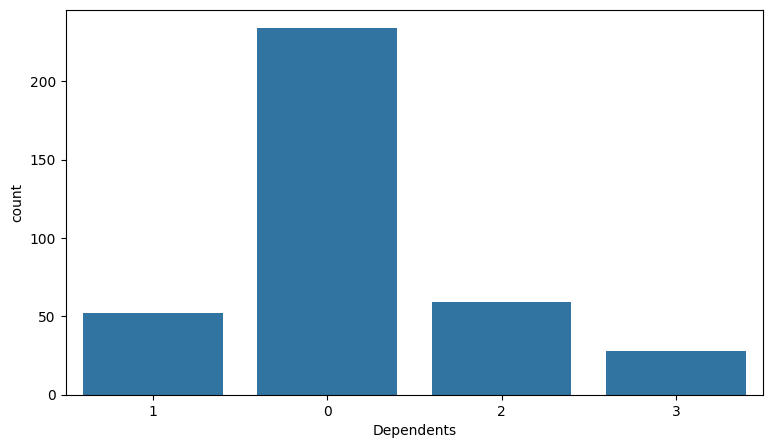

Dependents
0    234
2     59
1     52
3     28
Name: count, dtype: int64


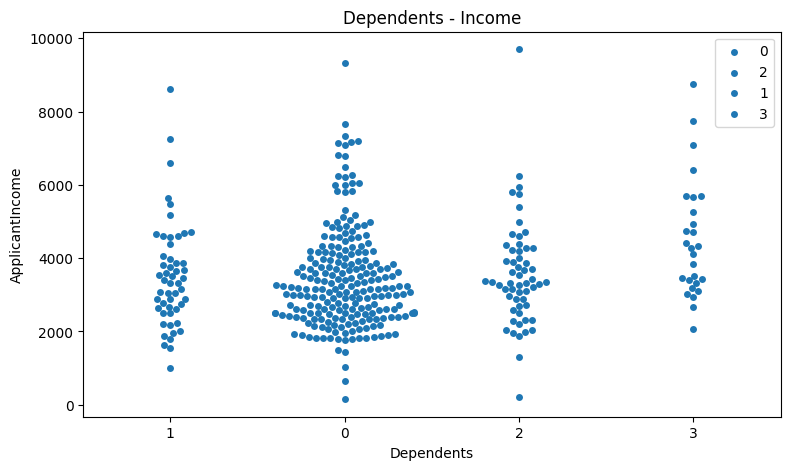

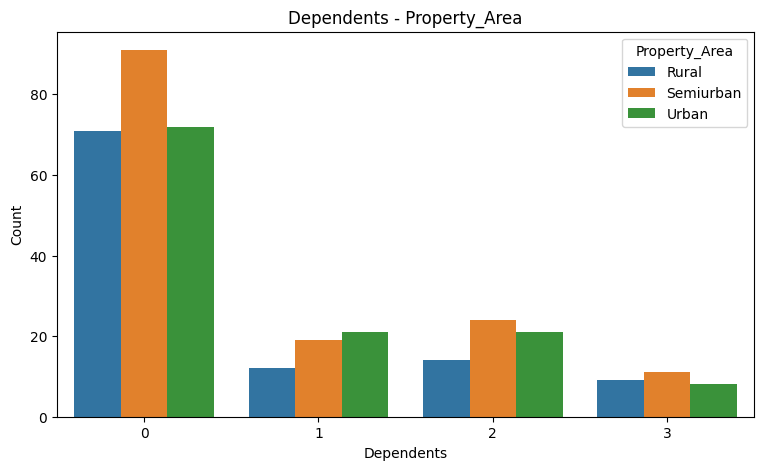

In [6]:
#Ailedeki kişi sayısı
df.Dependents = df.Dependents.replace('3+', '3')

plt.figure(figsize=(9,5))
sns.countplot(x = df.Dependents )
plt.show()
print(df.Dependents .value_counts())

#Gelir ile ailedeki kişi sayısı arasındaki ilişki
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Dependents", y = "ApplicantIncome",data = df)
plt.legend(df.Dependents.value_counts().index)
plt.title("Dependents - Income")
plt.show()
print('\n')
#Yaşanılan alan ile ailedeki kişi sayısı arasındaki ilişki
df_Dependents_PropertyArea = df.groupby(["Dependents","Property_Area"]).size().reset_index(name = "Count")
df_Dependents_PropertyArea['Dependents'] = df_Dependents_PropertyArea['Dependents'].astype(str)
df_Dependents_PropertyArea
plt.figure(figsize = (9,5))
sns.barplot(x = "Dependents",y="Count", hue = "Property_Area",data = df_Dependents_PropertyArea)
plt.title("Dependents - Property_Area")
plt.show()

#Grafiklerde büyük çoğunluk 0 olarak gözüküyor
df.Dependents = df.Dependents.fillna(0)

# **Eğitim sütunundaki boşlukları doldurmak için grafikleri karşılaştır**

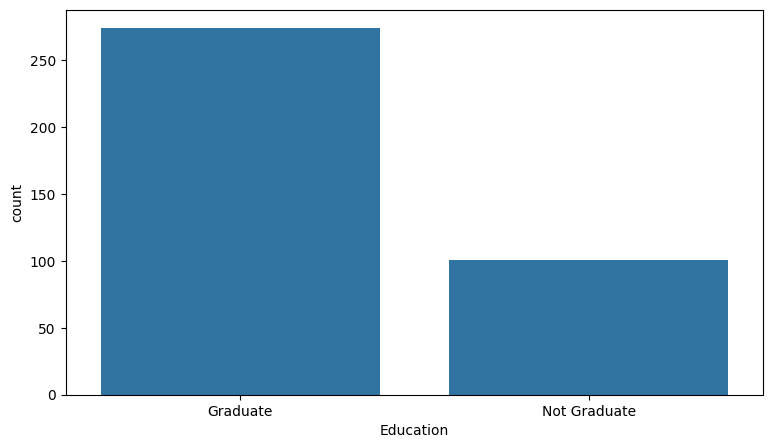

Education
Graduate        274
Not Graduate    101
Name: count, dtype: int64


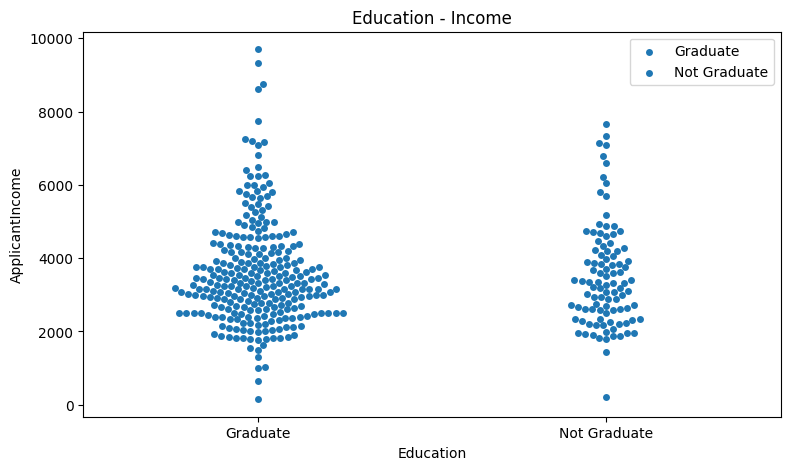

Graduate gelir ortalaması: 3583.8901515151515
Not graduate gelir ortalaması: 3514.161616161616




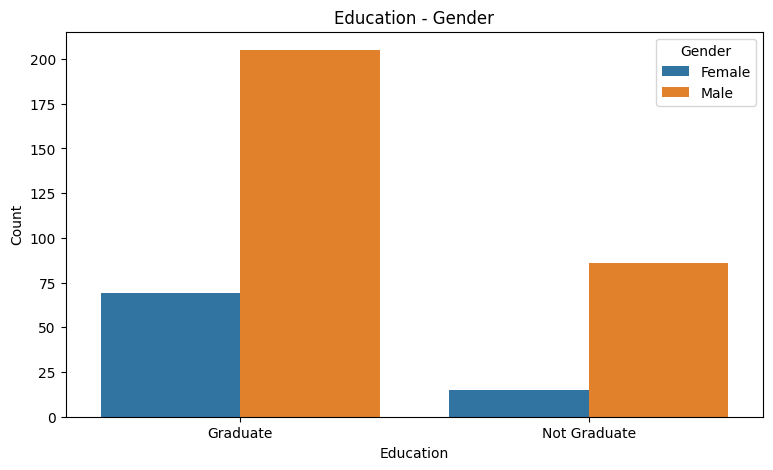

In [7]:
#Eğitim
plt.figure(figsize=(9,5))
sns.countplot(x = df.Education)
plt.show()
print(df.Education.value_counts())

#Eğitim ile gelir arasındaki ilişki
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Education", y = "ApplicantIncome",data = df)
plt.legend(df.Education.value_counts().index)
plt.title("Education - Income")
plt.show()

#Graduate gelir ortalaması
df_graduate = df[df.Education == 'Graduate']
df_graduate_mean = df_graduate.ApplicantIncome.mean()

#Not Graduate gelir ortalaması
df_notgraduate = df[df.Education == 'Not Graduate']
df_notgraduate_mean = df_notgraduate.ApplicantIncome.mean()

print(f'Graduate gelir ortalaması: {df_graduate_mean}\nNot graduate gelir ortalaması: {df_notgraduate_mean}')

print('\n')

# #Eğitim ile cinsiyet arasındaki ilişki
df_Education_Gender = df.groupby(["Education","Gender"]).size().reset_index(name = "Count")
df_Education_Gender
plt.figure(figsize = (9,5))
sns.barplot(x = "Education",y="Count", hue = "Gender",data = df_Education_Gender)
plt.title("Education - Gender")
plt.show()

#Kategorik veri olduğu için Education sütunundaki nan değerleri mode kullanarak doldur
df.Education = df.Education.fillna(df.Education.mode()[0])

# **Meslek sütunundaki boşlukları doldurmak için grafikleri karşılaştır**

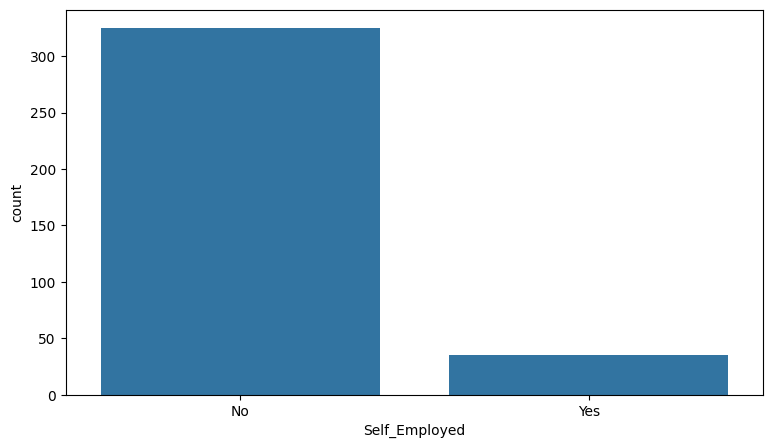

Self_Employed
No     325
Yes     35
Name: count, dtype: int64
Serbest çalışmayanların gelir ortalaması:3458.1174603174604
Serbest çalışanların gelir ortalaması:4563.088235294118


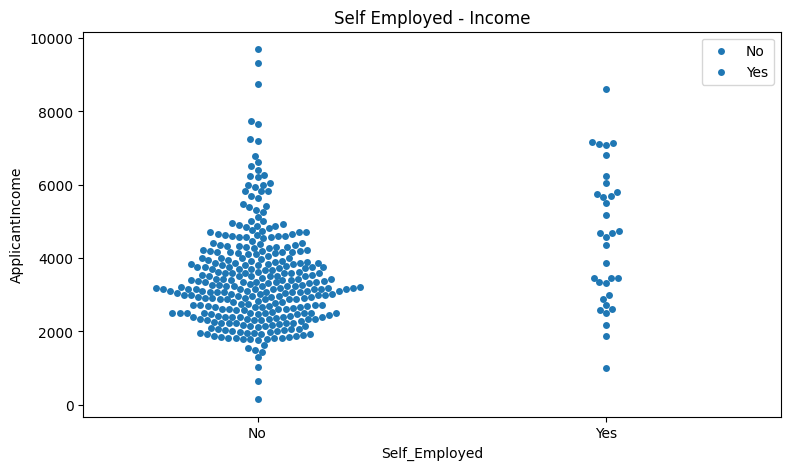

In [8]:
#Meslek
plt.figure(figsize=(9,5))
sns.countplot(x = df.Self_Employed)
plt.show()
print(df.Self_Employed.value_counts())

#Meslek ile gelir arasındaki ilişki
plt.figure(figsize = (9,5))
sns.swarmplot(data=df, x="Self_Employed", y="ApplicantIncome")
plt.legend(df.Self_Employed.value_counts().index)
plt.title("Self Employed - Income")
plt.show

#Serbest çalışanların genel ortalaması
df_se_yes = df[df.Self_Employed == 'Yes']
df_se_yes_mean = df_se_yes.ApplicantIncome.mean()

#Serbest çalışmayanların gelir ortalaması
df_se_no = df[df.Self_Employed == 'No']
df_se_no_mean = df_se_no.ApplicantIncome.mean()

print(f'Serbest çalışmayanların gelir ortalaması:{df_se_no_mean}\nSerbest çalışanların gelir ortalaması:{df_se_yes_mean}')

#Gelirin serbest çalışıp çalışmama durumuna göre ortalamsına olan uzaklığını hesaplayıp hangisine daha yakınsa Yes veya No olarak doldurur
for index, row in df.iterrows():
    if pd.isnull(row['Self_Employed']):
        if abs(row['ApplicantIncome'] - df_se_yes_mean) <= abs(row['ApplicantIncome'] - df_se_no_mean):
            df.at[index, 'Self_Employed'] = 'Yes'
        else:
            df.at[index, 'Self_Employed'] = 'No'

# **Başvuran geliri sütunundaki boşlukları doldurmak için grafikleri karşılaştır**

C:\Users\ooozg\AppData\Local\Temp\ipykernel_15804\2947072105.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ApplicantIncome)


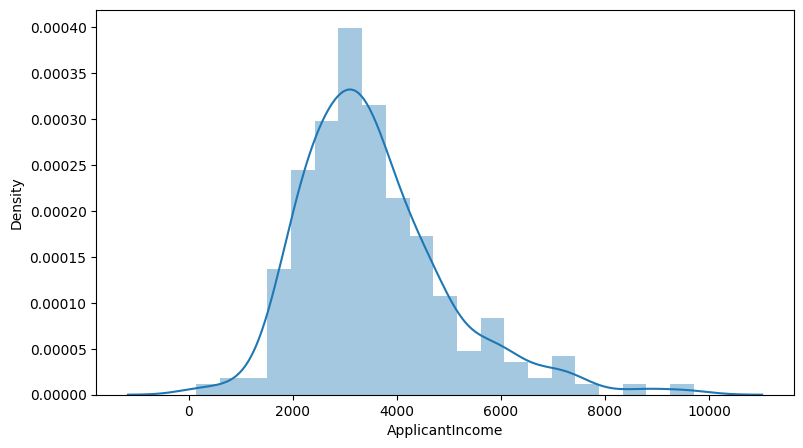

count     369.000000
mean     3563.422764
std      1427.371257
min       150.000000
25%      2583.000000
50%      3326.000000
75%      4226.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64
Genel Gelir ortalaması: 3563.4227642276423



In [9]:
#Gelir
plt.figure(figsize = (9,5))
sns.distplot(df.ApplicantIncome)
plt.show()
print(df.ApplicantIncome.describe())

#Genel gelir ortalaması
df_ApplicantIncome_mean = df.ApplicantIncome.mean()

print(f'Genel Gelir ortalaması: {df_ApplicantIncome_mean}\n')

#Serbest çalışıp çalışmadığına göre geliri ortalamayla doldurulacak.
df.loc[df['Self_Employed'] == 'Yes', 'ApplicantIncome'] = df[df['Self_Employed'] == 'Yes']['ApplicantIncome'].fillna(df_se_yes_mean)
df.loc[df['Self_Employed'] == 'No', 'ApplicantIncome'] = df[df['Self_Employed'] == 'No']['ApplicantIncome'].fillna(df_se_no_mean)

# **Kefil geliri sütunundaki boşlukları doldurmak için grafikleri karşılaştır**

C:\Users\ooozg\AppData\Local\Temp\ipykernel_15804\574711229.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CoapplicantIncome)


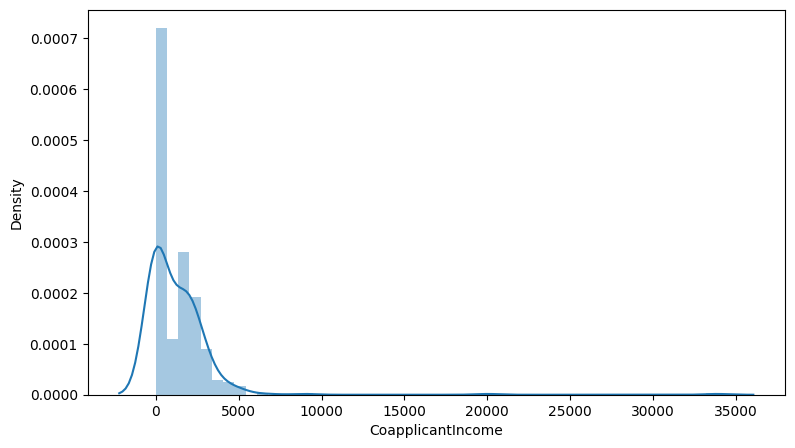

count      363.000000
mean      1267.005289
std       2388.048316
min          0.000000
25%          0.000000
50%        830.000000
75%       2008.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64
CoapplicantIncome
0.0       173
1666.0      4
1800.0      3
2083.0      3
2500.0      3
         ... 
2138.0      1
2365.0      1
2816.0      1
1083.0      1
3300.0      1
Name: count, Length: 169, dtype: int64


In [10]:
#Kefil
plt.figure(figsize = (9,5))
sns.distplot(df.CoapplicantIncome)
plt.show()
print(df.CoapplicantIncome.describe())
print(df['CoapplicantIncome'].value_counts())
#Bu sütunu etkileyen bir değer olmadığı için genel ortalama ile doldurulacak
df.CoapplicantIncome = df.CoapplicantIncome.fillna(df.CoapplicantIncome.mean())

# **Kredi değeri sütunundaki boşlukları doldrurmak için grafikleri karşılaştır**

C:\Users\ooozg\AppData\Local\Temp\ipykernel_15804\3799631799.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount)


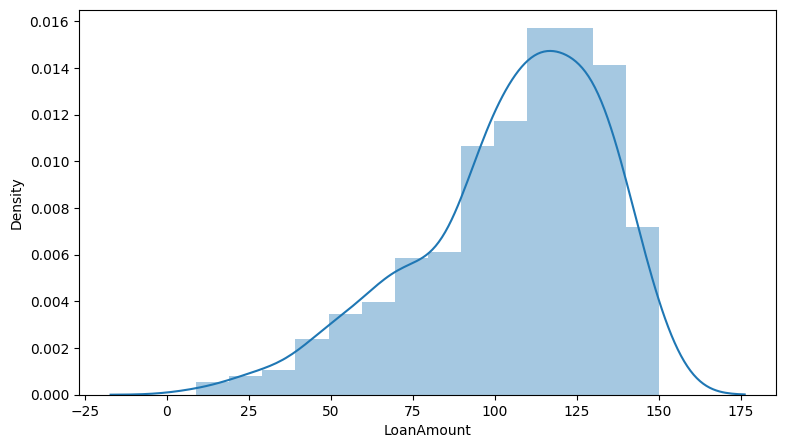

count    373.000000
mean     104.914209
std       28.484822
min        9.000000
25%       90.000000
50%      110.000000
75%      127.000000
max      150.000000
Name: LoanAmount, dtype: float64


In [11]:
#Kredi Değeri
plt.figure(figsize = (9,5))
sns.distplot(df.LoanAmount)
plt.show()
print(df.LoanAmount.describe())

#Ortalama değerle doldurabiliriz
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

# **Kredi süresi sütunundaki boşlukları doldrurmak için grafikleri karşılaştır**

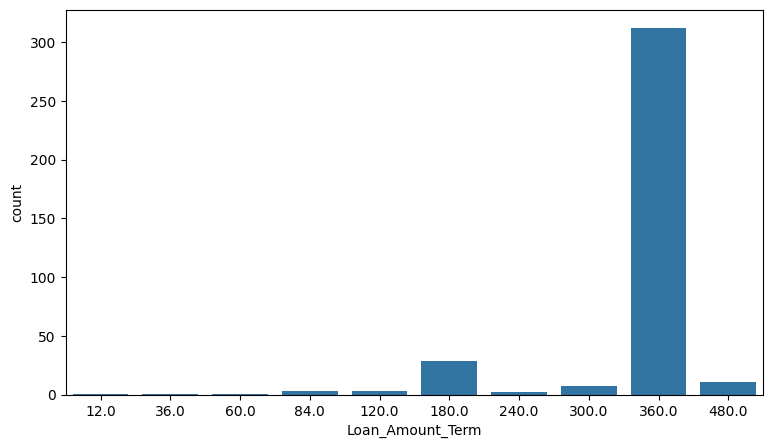

count    370.000000
mean     340.864865
std       68.549257
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


In [12]:
#Kredi Süresi
plt.figure(figsize = (9,5))
sns.countplot(x = df.Loan_Amount_Term, )
plt.show()
print(df.Loan_Amount_Term.describe())
#Mode ile doldurulacak
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

# **Kredi geçmişi sütunundaki boşlukları doldrurmak için grafikleri karşılaştır**

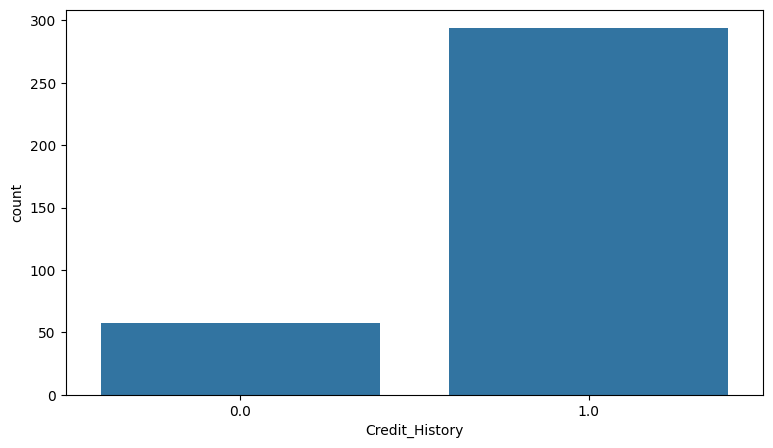

<Figure size 900x500 with 0 Axes>

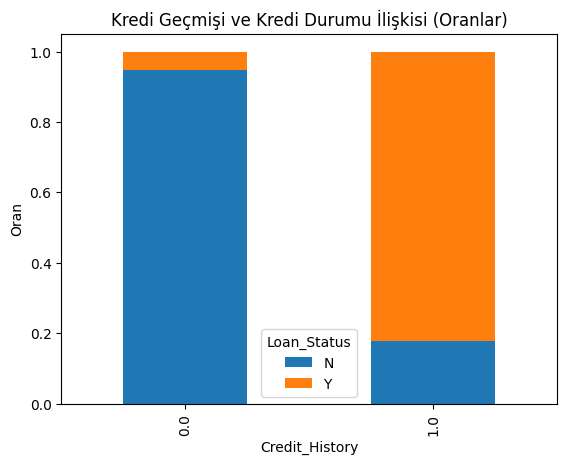

In [13]:
#Kredi Geçmişi
plt.figure(figsize = (9,5))
sns.countplot(x = df.Credit_History)
plt.show()

# Cross-tabulation (çapraz tablo) oluşturma
cross_tab = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index')

#Kredi geçmişi ile kredi alma durumu arasındaki ilişki
plt.figure(figsize=(9, 5))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel("Credit_History")
plt.ylabel("Oran")
plt.title("Kredi Geçmişi ve Kredi Durumu İlişkisi (Oranlar)")
plt.show()

#Kredi almış olanların kredi geçmişi 1 almayanların 0 ile doldurulacak
df.loc[df['Loan_Status'] == 'Y', 'Credit_History'] = df[df['Loan_Status'] == 'Y']['Credit_History'].fillna(1)
df.loc[df['Loan_Status'] == 'N', 'Credit_History'] = df[df['Loan_Status'] == 'N']['Credit_History'].fillna(0)

#**Null değer kaldı mı?**

In [14]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# **Kategorik verileri sayısal verilere dönüştürme**

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Married = le.fit_transform(df.Married)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)
df.Gender = le.fit_transform(df.Gender)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Education = le.fit_transform(df.Education)

# **Kolerasyon tablosu ile sütunlar arasındaki ilişkiyi incele**

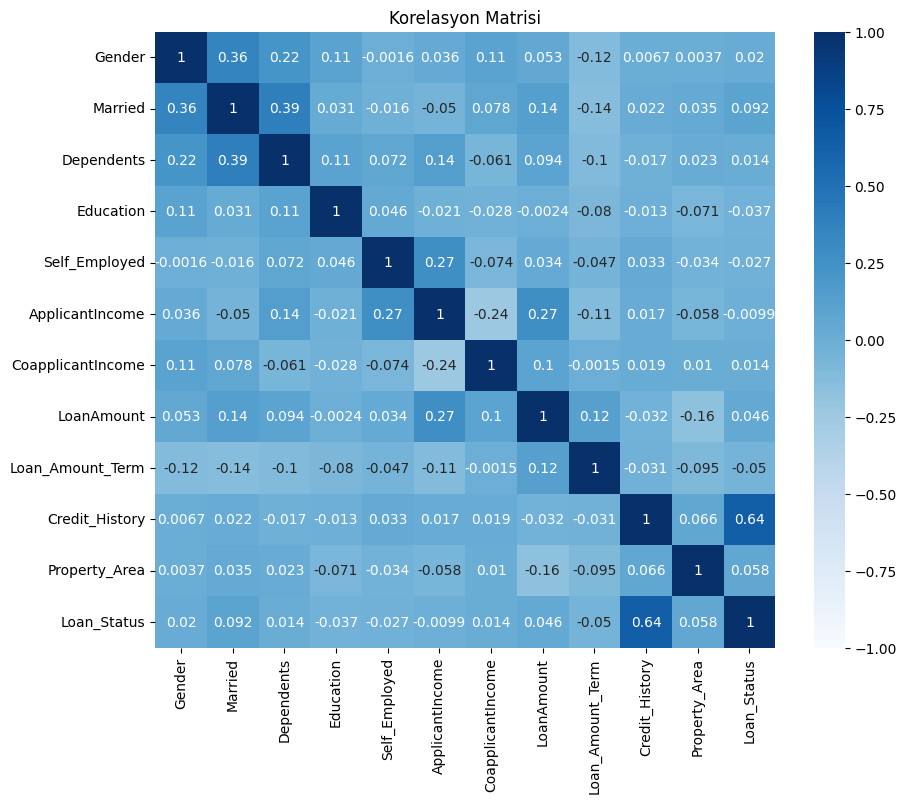

In [16]:
#Kolerasyon tablosu ile ilşki durumlarını incele
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1,)
plt.title('Korelasyon Matrisi')
plt.show()

# **Veriyi X ve y olarak ayır**



In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# **Eğitim ve test seti olarak bölme**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Normalizasyon yaparak büyük değerlerin baskınlığını azalt**

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# **Logistic Regression**


In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


# **Logistic Regression Confussion Matrix ve Accuracy Score**

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_scores = {}
cm_lr = confusion_matrix(y_test, y_pred_lr)
ac_lr = accuracy_score(y_test, y_pred_lr, normalize = True)

accuracy_scores['Linear Regression'] = ac_lr
print(cm_lr)
print(ac_lr)

[[10 12]
 [ 1 54]]
0.8311688311688312


# **Logistic Regression için K-Fold Cross Validation**

In [22]:
from sklearn.model_selection import cross_val_score

accuracies_lr = cross_val_score(estimator = LR, X = X_train, y  = y_train, cv = 10)
kfold_accuracy_scores = {}
acm_lr = accuracies_lr.mean()
acstd_lr = accuracies_lr.std()
kfold_accuracy_scores['Logistic Regression'] = acm_lr
print(accuracies_lr.reshape(len(accuracies_lr),1),'\n',acm_lr,'\n',acstd_lr)

[[0.83870968]
 [0.83870968]
 [0.90322581]
 [0.87096774]
 [0.8       ]
 [0.93333333]
 [0.83333333]
 [0.83333333]
 [0.9       ]
 [0.86666667]] 
 0.8618279569892474 
 0.03860873936640587


# **En iyi modeli ve en iyi parametreleri bulmak için Grid Search uygulanması**


In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(estimator = LR,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

LR2 = LogisticRegression(C = 0.1, fit_intercept  = True, penalty = 'l2')
LR2.fit(X_train, y_train)
y_pred_lr = LR2.predict(X_test)

h_accuracy_scores = {}
h_ac_lr = accuracy_score(y_test, y_pred_lr, normalize = True)
h_accuracy_scores['Linear Regression'] = h_ac_lr
print(h_ac_lr)

Best Accuracy: 86.18 %
Best Parameters: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
0.8311688311688312


c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ooozg\AppD

#**K-NN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
KNC.fit(X_train, y_train)
y_pred_knn = KNC.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


# **KNN Confussion Matrix ve Accuracy Score**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_knc = confusion_matrix(y_test, y_pred_knn)
ac_knc = accuracy_score(y_test, y_pred_knn, normalize = True)
accuracy_scores['KNN'] = ac_knc
print(cm_knc)
print(ac_knc)

[[10 12]
 [ 3 52]]
0.8051948051948052


# **KNN için K-Fold Cross Validation**

In [26]:
from sklearn.model_selection import cross_val_score

accuracies_knc = cross_val_score(estimator = KNC, X = X_train, y  = y_train, cv = 10)
acm_knc = accuracies_knc.mean()
acstd_knc = accuracies_knc.std()
kfold_accuracy_scores['KNN'] = acm_knc
print(accuracies_knc.reshape(len(accuracies_knc),1),'\n',acm_knc,'\n',acstd_knc)

[[0.80645161]
 [0.80645161]
 [0.87096774]
 [0.80645161]
 [0.76666667]
 [0.93333333]
 [0.76666667]
 [0.86666667]
 [0.86666667]
 [0.86666667]] 
 0.8356989247311828 
 0.05074494200044714


# **En iyi modeli ve en iyi parametreleri bulmak için Grid Search uygulanması**

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}
grid_search = GridSearchCV(estimator = KNC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

h_KNC = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 13, weights = 'distance')
h_KNC.fit(X_train, y_train)
y_pred_knn = KNC.predict(X_test)

h_ac_knn = accuracy_score(y_test, y_pred_knn, normalize = True)
h_accuracy_scores['KNN'] = h_ac_knn
print(h_ac_knn)

Best Accuracy: 86.18 %
Best Parameters: {'metric': 'cosine', 'n_neighbors': 13, 'weights': 'uniform'}
0.8051948051948052


# **SVC**

In [28]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(np.concatenate((y_pred_svc.reshape(len(y_pred_svc), 1), y_test.reshape(len(y_test), 1)), 1))


[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


# **SVC Confussion Matrix ve Accuracy Score**

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(y_test, y_pred_svc)
ac_svc = accuracy_score(y_test, y_pred_svc, normalize = True)
accuracy_scores['SVC'] = ac_svc
print(cm_svc)
print(ac_svc)

[[10 12]
 [ 1 54]]
0.8311688311688312


# **SVC için K-Fold Cross Validation**

In [30]:
from sklearn.model_selection import cross_val_score

accuracies_svc = cross_val_score(estimator = svc, X = X_train, y  = y_train, cv = 10)
acm_svc = accuracies_svc.mean()
acstd_svc = accuracies_svc.std()
kfold_accuracy_scores['SVC'] = acm_svc
print(accuracies_svc.reshape(len(accuracies_svc),1),'\n',acm_svc,'\n',acstd_svc)

[[0.83870968]
 [0.83870968]
 [0.90322581]
 [0.87096774]
 [0.8       ]
 [0.93333333]
 [0.83333333]
 [0.83333333]
 [0.9       ]
 [0.86666667]] 
 0.8618279569892474 
 0.03860873936640587


# **En iyi modeli ve en iyi parametreleri bulmak için Grid Search uygulanması**

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

h_svc = SVC(kernel = 'rbf', gamma = 0.1, C = 0.5, random_state = 0)
h_svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

h_ac_svc = accuracy_score(y_test, y_pred_svc, normalize = True)
h_accuracy_scores['SVC'] = h_ac_svc
print(h_ac_svc)

Best Accuracy: 86.52 %
Best Parameters: {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8311688311688312


# **Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train, y_train)
y_pred_dtc = DTC.predict(X_test)
print(np.concatenate((y_pred_dtc.reshape(len(y_pred_dtc), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


# **Decision Tree Confussion Matrix ve Accuracy Score**

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
ac_dtc = accuracy_score(y_test, y_pred_dtc, normalize = True)
accuracy_scores['Decision Tree'] = ac_dtc
print(cm_dtc)
print(ac_dtc)

[[13  9]
 [16 39]]
0.6753246753246753



# **Decision Tree için K-Fold Cross Validation**

In [34]:
from sklearn.model_selection import cross_val_score

accuracies_dtc = cross_val_score(estimator = DTC, X = X_train, y  = y_train, cv = 10)
acm_dtc = accuracies_dtc.mean()
acstd_dtc = accuracies_dtc.std()
kfold_accuracy_scores['Decision Tree'] = acm_dtc
print(accuracies_dtc.reshape(len(accuracies_dtc),1),'\n',acm_dtc,'\n',acstd_dtc)

[[0.77419355]
 [0.74193548]
 [0.83870968]
 [0.83870968]
 [0.8       ]
 [0.83333333]
 [0.73333333]
 [0.73333333]
 [0.8       ]
 [0.83333333]] 
 0.7926881720430107 
 0.041965249981804974


# **En iyi modeli ve en iyi parametreleri bulmak için Grid Search uygulanması**




In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator = DTC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

h_DTC = DecisionTreeClassifier(criterion='entropy')
h_DTC.fit(X_train, y_train)
y_pred_dtc = h_DTC.predict(X_test)

h_ac_dtc = accuracy_score(y_test, y_pred_dtc, normalize = True)
h_accuracy_scores['Decision Tree'] = h_ac_dtc
print(h_ac_dtc)

Best Accuracy: 86.18 %
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 2}
0.7012987012987013


# **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)
y_pred_rfc = RFC.predict(X_test)
print(np.concatenate((y_pred_rfc.reshape(len(y_pred_rfc), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]]


# **Random Forest Confussion Matrix ve Accuracy Score**

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
ac_rfc = accuracy_score(y_test, y_pred_rfc, normalize = True)
accuracy_scores['Random Forest'] = ac_rfc
print(cm_rfc)
print(ac_rfc)

[[12 10]
 [ 6 49]]
0.7922077922077922


# **Random Forest için K-Fold Cross Validation**

In [38]:
from sklearn.model_selection import cross_val_score

accuracies_rfc = cross_val_score(estimator = RFC, X = X_train, y  = y_train, cv = 10)
acm_rfc = accuracies_rfc.mean()
acstd_rfc = accuracies_rfc.std()
kfold_accuracy_scores['Random Forest'] = acm_rfc
print(accuracies_rfc.reshape(len(accuracies_rfc),1),'\n',acm_rfc,'\n',acstd_rfc)

[[0.77419355]
 [0.83870968]
 [0.87096774]
 [0.93548387]
 [0.8       ]
 [0.9       ]
 [0.83333333]
 [0.76666667]
 [0.9       ]
 [0.86666667]] 
 0.8486021505376344 
 0.05348054604846766


# **En iyi modeli ve en iyi parametreleri bulmak için Grid Search uygulanması**

In [39]:
from sklearn.model_selection import GridSearchCV

parameters ={
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator = RFC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

h_RFC = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
h_RFC.fit(X_train, y_train)
y_pred_rfc = h_RFC.predict(X_test)

h_ac_rfc = accuracy_score(y_test, y_pred_rfc, normalize = True)
h_accuracy_scores['Random Forest'] = h_ac_rfc
print(h_ac_rfc)

c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
431 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ooozg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Best Accuracy: 87.48 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.8311688311688312


# **Hyperparameter ayarından önceki doğruluk Skorları**

In [40]:
for algorithm, score in accuracy_scores.items():
    print(f'{algorithm:<25}{100*score:.2f}'+'%')

Linear Regression        83.12%
KNN                      80.52%
SVC                      83.12%
Decision Tree            67.53%
Random Forest            79.22%


# **K-Fold Cross Validation doğruluk skorları**

In [41]:
for algorithm, score in kfold_accuracy_scores.items():
    print(f'{algorithm:<25}{100*score:.2f}%')

Logistic Regression      86.18%
KNN                      83.57%
SVC                      86.18%
Decision Tree            79.27%
Random Forest            84.86%


# **Hyperparameter ayarından sonraki doğruluk Skorları**

In [42]:
for algorithm, score in h_accuracy_scores.items():
    print(f'{algorithm:<25}{100*score:.2f}%')

Linear Regression        83.12%
KNN                      80.52%
SVC                      83.12%
Decision Tree            70.13%
Random Forest            83.12%
